### All code below was used to create the Data class

In [2]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 100)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise

    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, maxfev=10000,method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y, popt)



x,y_noisy = toyData()
fit_y, params = fitCurve(x, y_noisy)

In [3]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


NameError: name 'x_noisy' is not defined

In [4]:
def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(4,4, figsize= (15,15))
    for i in range(16):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index
        x, y_noisy = toyData(mu = np.random.rand(),std = 0.2)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[row, col].scatter(x, y_noisy, label='Noisy data')
        axs[row, col].plot(x, fit_y, 'r-', label='Fitted')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].set_title('Electrode ' + str(i))
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b'])
    return(df)

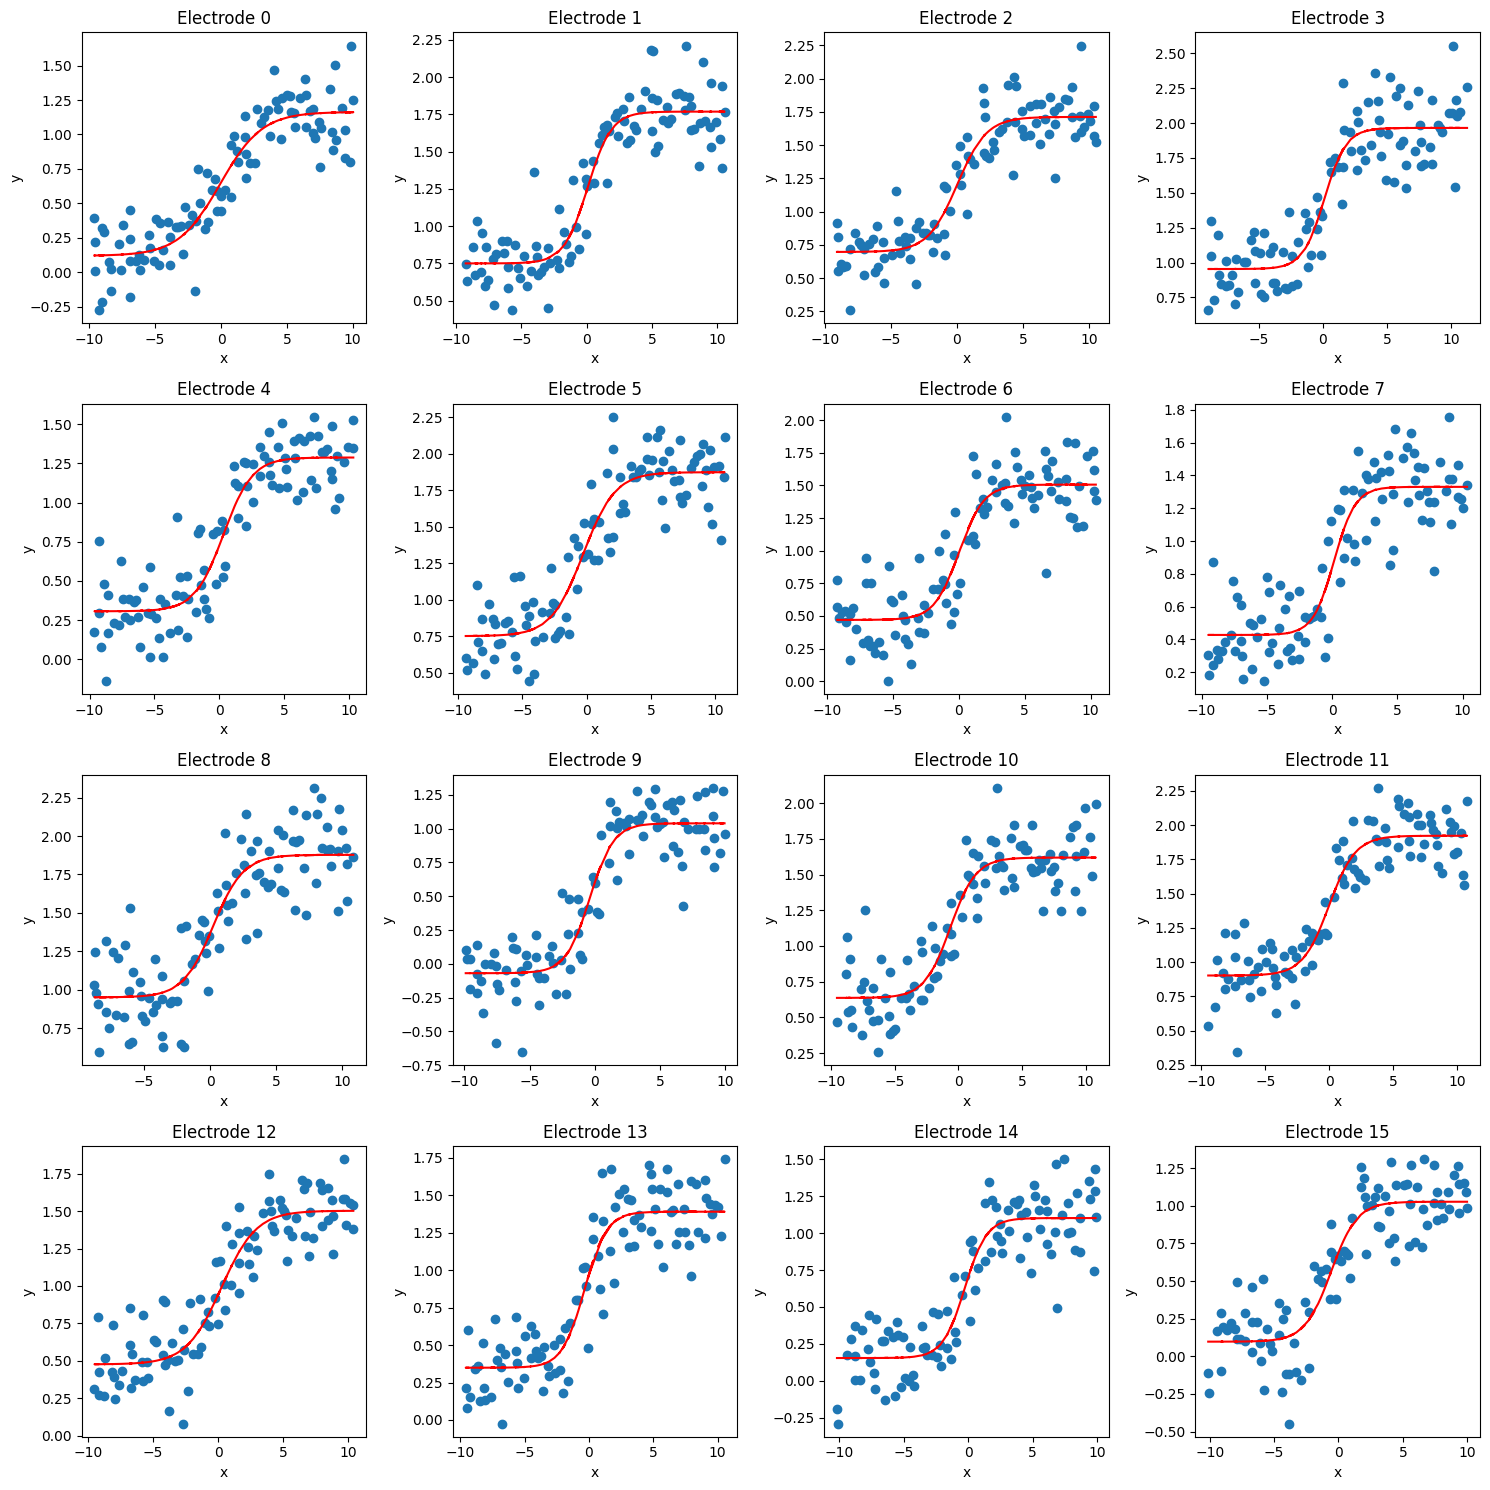

,L,x0,k,b
0,1.045168,-0.059168,0.630964,0.118552
1,1.019352,0.084812,1.101459,0.749369
2,1.014765,0.031178,0.898530,0.696506
3,1.011608,0.134801,1.183707,0.954024
4,0.980610,0.332335,0.898688,0.306762
5,1.122231,-0.277244,0.804110,0.752490
6,1.036009,0.026320,1.065151,0.470027
7,0.902835,0.154559,1.228918,0.427733
8,0.926961,0.235545,0.875593,0.950895
9,1.108613,-0.381620,1.098280,-0.069154


In [5]:
df = electrodePlot()
df

### Trying to fit to Matt's Data

In [1]:
import scipy.io

mattData = scipy.io.loadmat("C:/Users/Jjmas/OneDrive/Desktop/Research/Anne/Characterization.mat")

x_data = mattData['x_data']
y_data = mattData['y_data']
pulseWidth = x_data[0][0][0]


In [6]:
def electrodePlotMatt():
    fig, axs = plt.subplots(1,5, figsize= (15,5))
    angles= [ 'Index','MRS','Wrist']
    muscles= ['EDC','FDP','EIP',
             'ECRB', 'FCR' ]
    all_params = []
    for j in range(5):
        for i in range(3):
            # try:
            fit_y, params = fitCurve(pulseWidth,  y_data[j][i].flatten())
            all_params.append(list(params) + [j,i])
            # except:
            # print('Could not fit Line for ' + muscles[j] + ' ' + angles[i])
            axs[j].scatter(pulseWidth, y_data[j][i], label=angles[i])
            axs[j].plot(pulseWidth, fit_y, linestyle = '--')
        axs[j].set_title(muscles[j])
        axs[j].set_xlabel('Pulse Width')
        axs[j].set_ylabel('Angle Change')
    plt.legend()
    fig.suptitle('Electrode Characterization')
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b', 'Muscle', 'Angle'])
    return(df)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_38584\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


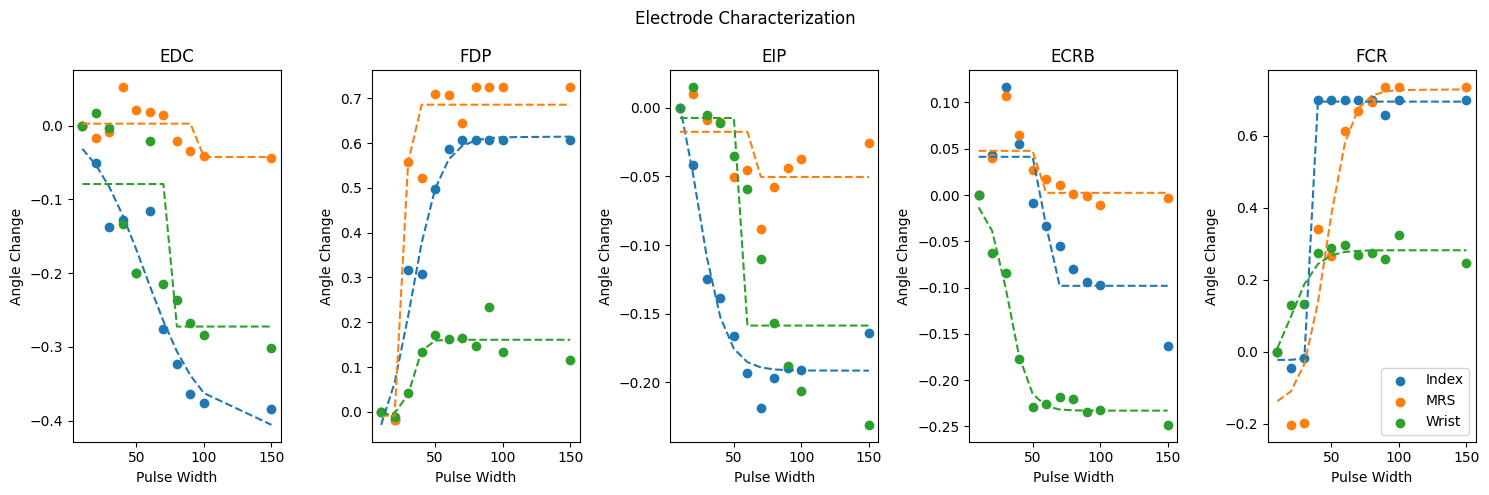

,L,x0,k,b,Muscle,Angle
0,-0.422066,56.373270,0.046981,0.011327,0,0
1,-0.045139,93.583864,60.908073,0.002543,0,1
2,-0.193110,74.864581,60.966773,-0.079286,0,2
3,0.723719,32.314525,0.093241,-0.109434,1,0
4,0.694173,29.132502,1.708981,-0.008621,1,1
5,0.167990,33.546866,0.272341,-0.007193,1,2
6,-0.246089,23.088013,0.099170,0.054725,2,0
7,-0.032878,63.139982,61.000000,-0.017468,2,1
8,-0.151125,57.517192,61.002435,-0.007417,2,2
9,-0.139400,59.997715,60.999957,0.041300,3,0


In [7]:
realParams = electrodePlotMatt()
realParams.describe()
realParams

### Modeling independent electrode interactions and possible angle space

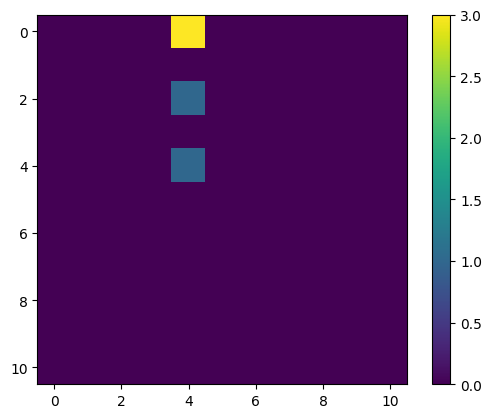

In [88]:
def angleDict(start= -0.5, end=0.5, binSize= 0.1):
    d= {}
    start, end = -0.5, 0.5  #eventually can replace with min and max of data
    bins = np.arange(start, end+binSize, binSize)
    for x in bins:
        index = round(x,1) +0
        for y in bins:
            wrist = round(y,1)+0
            d[(index, wrist)] = 0
    return d


def dictChecker(array1, array2, d):
    for val1,val2 in zip(array1, array2):
        key = (float(f"{val1[0]:.1f}"), float(f"{val2[0]:.1f}"))  #was having some floating point error and couldn't find key in dict, so this is a workaround
        if key in d:
            d[key] += 1
        else:  #ideally this will never be run, if it is, then values are out of the range of the dict
            d[key] = 1

def get_index(value, start=-0.5, bin_size= 0.1):
    return int((value - start) // bin_size)

def dictPlot(d,start= -0.5, end=0.5,binSize= 0.1):
    bins = np.arange(start, end+binSize, binSize)
    heatmap = np.zeros((len(bins),len(bins)))
    for x in bins:
        index = round(x,1) +0    #yeah, duplicate code, need to turn this into a command class
        for y in bins:
            wrist = round(y,1)+0
            heatmap[get_index(index)][get_index(wrist)] = d[(index,wrist)]
    plt.imshow(heatmap)
    plt.colorbar()
    plt.show()

d = angleDict()
array1, array2 = y_data[0,0],y_data[0,1]
dictChecker(array1, array2, d)
dictPlot(d)


In [8]:
import itertools
electrodeStates = list(itertools.product([0,1], repeat=5))  # all possible electrode states
len(electrodeStates)

32

In [22]:
def sigmoidSum(state, realParams):
    for e, is_active in enumerate(state):
        # print(e)
        index, mrs, wrist = 0, 0, 0
        # print(e, is_active)
        if (is_active):
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 0)].loc[:,['L','x0','k','b']].values[0]
            index+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 1)].loc[:,['L','x0','k','b']].values[0]
            mrs+= sigmoid(pulseWidth, *param )
            param = realParams[(realParams['Muscle'] == e) & (realParams['Angle'] == 2)].loc[:,['L','x0','k','b']].values[0]
            wrist+= sigmoid(pulseWidth, *param )
    return index, mrs, wrist

sigmoidSum(electrodeStates[3], realParams)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


(array([-0.02262524, -0.02262524, -0.0184971 ,  0.69553139,  0.69553139,
         0.69553139,  0.69553139,  0.69553139,  0.69553139,  0.69553139,
         0.69553139]),
 array([-0.13733771, -0.11030039, -0.03446482,  0.13607742,  0.38255657,
         0.58006889,  0.67634625,  0.71206505,  0.72393448,  0.72773177,
         0.72947728]),
 array([0.00960865, 0.09731329, 0.18780174, 0.24380062, 0.26832835,
        0.27742626, 0.28058874, 0.28166299, 0.28202503, 0.28214672,
        0.28220797]))

In [24]:
angle_spaces = [sigmoidSum(state, realParams) for state in electrodeStates]
len(angle_spaces)

C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b
C:\Users\Jjmas\AppData\Local\Temp\ipykernel_28232\2567883890.py:12: RuntimeWarning: overflow encount

32

In [25]:
mapping = {}

for w, i in zip(wristAngle, indexAngle):
    mapping[w][i] = 

TypeError: list indices must be integers or slices, not tuple

In [40]:
angle_spaces[1][2]

array([0.00960865, 0.09731329, 0.18780174, 0.24380062, 0.26832835,
       0.27742626, 0.28058874, 0.28166299, 0.28202503, 0.28214672,
       0.28220797])